<a href="https://colab.research.google.com/github/rajapedd/AIML-Course/blob/main/Module3/Session3/Image_Data_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📸 Image Data Pre-Processing in Data Science


🧠 What is Image Data Pre-Processing?
In the world of Data Science, image data is used in applications like facial recognition, medical diagnostics, self-driving cars, and more. But raw images directly from a camera or other sources aren’t ready for analysis or modeling. That’s where image pre-processing comes in!

Think of it as preparing your ingredients before cooking. You clean them, cut them, and measure them — just like we "clean" and format image data before feeding it to a machine learning model.

1. Image Acquisition
📷 What is it?
Image acquisition is the process of capturing an image using a camera or other imaging device. This is the first step in any image analysis pipeline.

  🏭 Industry Use Case:
Medical Imaging: X-rays, MRIs are captured using specialized medical devices.

  Manufacturing: Cameras inspect product quality on assembly lines.

2. Image Pre-Processing
🧼 What is it?
Image pre-processing improves image quality and converts images into a format suitable for machine learning.

  🔧 Common Steps:
Resize,Convert to grayscale,Normalize pixel values,Remove noise

  🏭 Industry Use Case:
Healthcare: Normalize MRI images before tumor detection.

  Retail: Enhance product images for recommendation systems.

  - Image Data Representation
🧮 How is an Image Represented in a Computer?
Images are stored as arrays of numbers. Each pixel in an image has color information stored as values, typically RGB (Red, Green, Blue).

  Grayscale images = 2D array (height x width)

  Color (RGB) images = 3D array (height x width x 3)

3. Image Analysis:
Image analysis involves extracting useful information or patterns from an image.

  📈 Techniques include:
  - Edge detection

  - Object detection

  - Segmentation

  - Feature extraction

  🏭 Industry Use Case:
  Security: Face recognition in surveillance.

  Agriculture: Analyze crop health using satellite images.

| Step              | Purpose                                    | Tools Used               | Real-World Use Case                  |
| ----------------- | ------------------------------------------ | ------------------------ | ------------------------------------ |
| Image Acquisition | Capture or load images                     | `PIL`, `requests`        | Medical scans, manufacturing cameras |
| Pre-Processing    | Clean, resize, and prepare images          | `PIL`, `ImageOps`, `cv2` | Retail, healthcare                   |
| Representation    | Understand how images are stored in memory | `NumPy`                  | All image analysis tasks             |
| Analysis          | Extract meaningful information from images | `OpenCV`, `Matplotlib`   | Face detection, object recognition   |


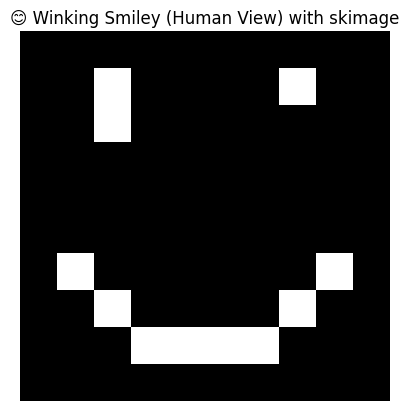

🤖 Pixel Values (How Computer Sees It):

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0 255   0   0   0   0 255   0   0]
 [  0   0 255   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0 255   0   0   0   0   0   0 255   0]
 [  0   0 255   0   0   0   0 255   0   0]
 [  0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.color import gray2rgb

# 0 = black (background), 255 = white (smiley)
pixel_values = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 255, 0, 0],   # eyes: left open, right winking
    [0, 0, 255, 0, 0, 0, 0, 0, 0, 0],     # left eye line continues
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],       # empty line
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],       # empty line
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],       # empty line
    [0, 255, 0, 0, 0, 0, 0, 0, 255, 0],   # sides of smile
    [0, 0, 255, 0, 0, 0, 0, 255, 0, 0],   # curved middle
    [0, 0, 0, 255, 255, 255, 255, 0, 0, 0], # bottom of smile
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]

# Convert to numpy array with uint8
image_array = np.array(pixel_values, dtype=np.uint8)

# Display with skimage and matplotlib
plt.imshow(image_array, cmap='gray')
plt.title("😊 Winking Smiley (Human View) with skimage")
plt.axis('off')
plt.show()

# Print pixel values (how computer sees it)
print("🤖 Pixel Values (How Computer Sees It):\n")
print(image_array)


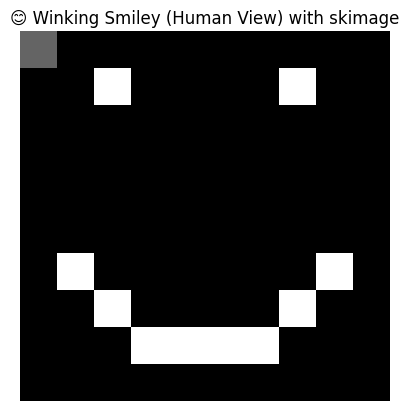

🤖 Pixel Values (How Computer Sees It):

[[100   0   0   0   0   0   0   0   0   0]
 [  0   0 255   0   0   0   0 255   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0 255   0   0   0   0   0   0 255   0]
 [  0   0 255   0   0   0   0 255   0   0]
 [  0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.color import gray2rgb

# 0 = black (background), 255 = white (smiley)
pixel_values = [
    [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 255, 0, 0],   # eyes: left open, right winking
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],     # left eye line continues
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],       # empty line
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],       # empty line
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],       # empty line
    [0, 255, 0, 0, 0, 0, 0, 0, 255, 0],   # sides of smile
    [0, 0, 255, 0, 0, 0, 0, 255, 0, 0],   # curved middle
    [0, 0, 0, 255, 255, 255, 255, 0, 0, 0], # bottom of smile
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]

# Convert to numpy array with uint8
image_array = np.array(pixel_values, dtype=np.uint8)

# Display with skimage and matplotlib
plt.imshow(image_array, cmap='gray')
plt.title("😊 Winking Smiley (Human View) with skimage")
plt.axis('off')
plt.show()

# Print pixel values (how computer sees it)
print("🤖 Pixel Values (How Computer Sees It):\n")
print(image_array)


🎨 Why Pixel Values Are from 0 to 255?
Computers store images using bytes.

A byte = 8 bits, and it can store numbers from 0 to 255.

So each pixel's brightness (in grayscale) is stored as a number:

0 = black

255 = white

Values in between (like 128) = gray

🔍 Why 256 total values?
Because:
2^8 = 256 → counts from 0 to 255

In [ ]:
# More Examples

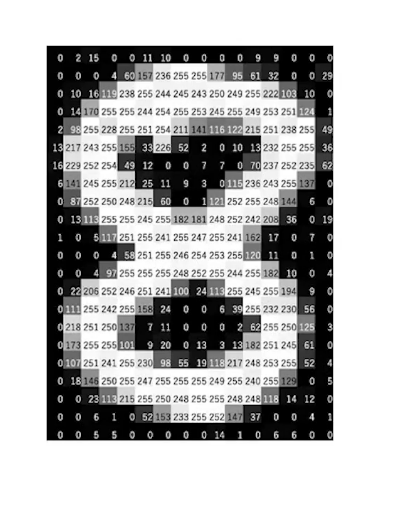

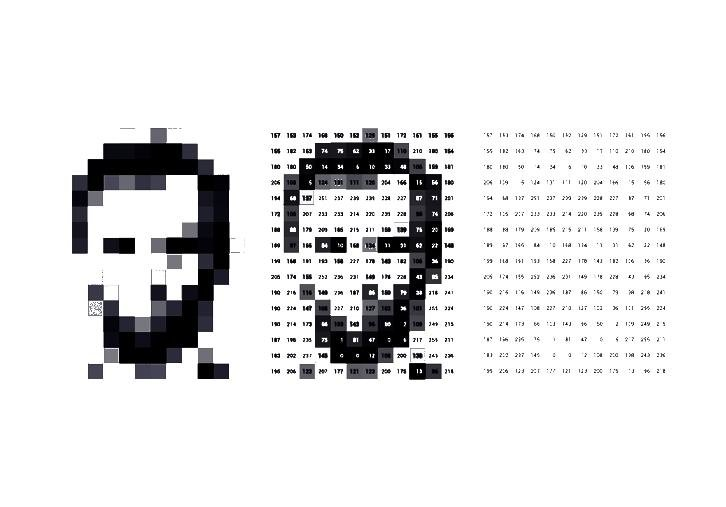

In [ ]:
import warnings
warnings.filterwarnings('ignore')


# Image Representation

📦 What is skimage?
skimage is short for Scikit-Image, a Python library used for:

Image processing

Image filtering

Color conversion

Feature extraction

📦 To install: pip install scikit-image



Do you want to upload an image? (yes/no): no
🟦 RGB Image Shape: (843, 719, 3)
⬛ Grayscale Image Shape: (843, 719)
🎨 HSV Image Shape: (843, 719, 3)


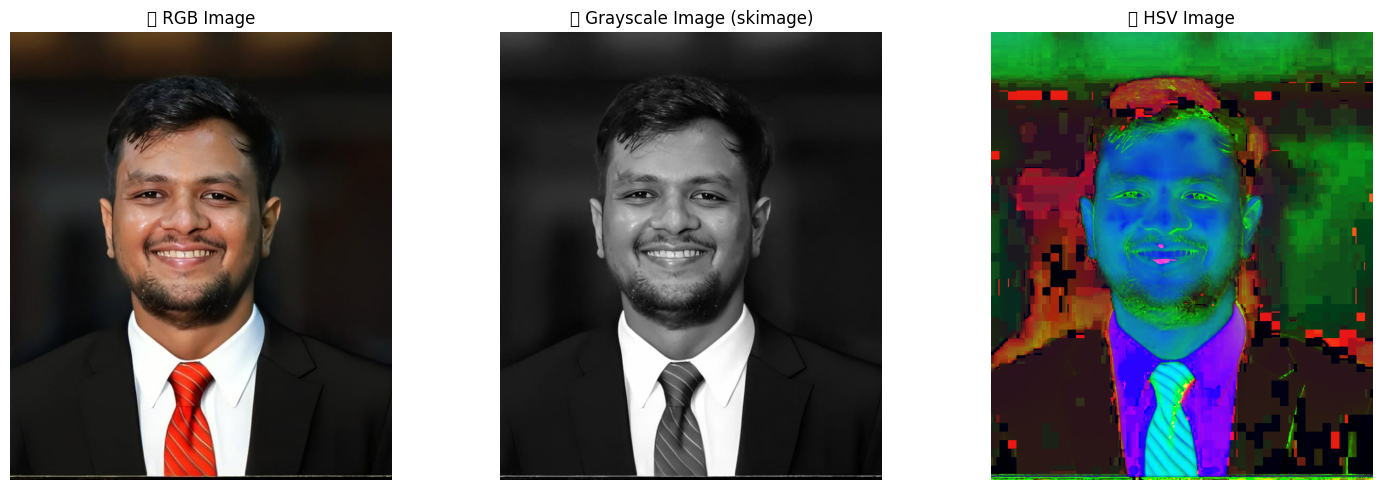

In [ ]:
# STEP 1: Import libraries
from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# STEP 2: Ask user to upload or use default image
choice = input("Do you want to upload an image? (yes/no): ").lower()

if choice == 'yes':
    # Upload image from local system
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]

    # Read image using skimage
    img_rgb = io.imread(filename)
else:
    # Use image from URL
    url = "https://drive.google.com/uc?id=11LpbXBrEF005XA7k-Wd6W_VNnyXCOtg6"
    img_rgb = io.imread(url)

# STEP 3: Convert to grayscale and HSV using skimage
img_gray = color.rgb2gray(img_rgb)
img_hsv = color.rgb2hsv(img_rgb)

# STEP 4: Show the shapes
print("🟦 RGB Image Shape:", img_rgb.shape)       # (H, W, 3)
print("⬛ Grayscale Image Shape:", img_gray.shape) # (H, W)
print("🎨 HSV Image Shape:", img_hsv.shape)       # (H, W, 3)

# STEP 5: Display all using subplot
plt.figure(figsize=(15, 5))

# RGB
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("🌈 RGB Image")
plt.axis('off')

# Grayscale
plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("🖤 Grayscale Image (skimage)")
plt.axis('off')

# HSV (only show hue component as image)
plt.subplot(1, 3, 3)
plt.imshow(img_hsv)
plt.title("🎨 HSV Image")
plt.axis('off')

plt.tight_layout()
plt.show()


🎨 What is HSV?
HSV stands for:

Hue – the color type (red, green, blue…)

Saturation – how strong/vivid the color is

Value – brightness (light to dark)

HSV is useful because:

It's closer to how humans perceive colors

Easier to filter or detect specific colors (e.g., find red objects)

| Feature           | RGB Image            | Grayscale Image        |
| ----------------- | -------------------- | ---------------------- |
| Channels          | 3 (Red, Green, Blue) | 1 (Intensity only)     |
| Shape (H x W x C) | e.g., (256, 256, 3)  | e.g., (256, 256)       |
| Memory Usage      | Higher               | Lower                  |
| Color Info        | Retained             | Lost                   |
| Visual Detail     | Full color           | Only brightness/shadow |
| Processing Speed  | Slower               | Faster                 |


🏭 When to Use RGB vs Grayscale in Industry?
✅ Use Grayscale when:
You only care about shape, edges, or structure

- Faster processing is required

- Example use cases:

  - Medical imaging (X-rays, MRIs)

  - Face detection

  - Barcode/QR code readers

✅ Use RGB when:
Color matters in the task

You need to identify or track objects based on color

- Example use cases:

  - Product classification (e.g., ripe fruit detection)

  - Scene segmentation in autonomous cars

  - Object detection (e.g., detecting red traffic signs)

# Image Resizing and Rescaling

🖼️ What is Image Resizing and Rescaling?<br>
<br>
Resizing: Changing the number of pixels in the image (its dimensions).

- Example: from 300×300 to 100×100 pixels.

Rescaling: Shrinking or enlarging the image by a scale factor, not absolute dimensions.

- Example: Rescale by 0.5 → image becomes half as big in both height and width.

These operations are part of preprocessing in data pipelines.

Real-World Use Cases of Resizing & Rescaling
- 🎫 1. Passport/ID Photo Processing
  - Government forms require standardized photo sizes (e.g., 413×531 pixels).

    Resizing ensures photos meet specifications.

    Rescaling helps preview photos in smaller formats (e.g., thumbnails).

- 📷 2. Face Recognition Systems
  - Resize all images to a fixed input size (e.g., 224×224) to feed into ML models.

    Makes training consistent and faster.

- 🧪 3. Medical Imaging
  - Standardize sizes of X-rays or CT scans before model training.

    Allows batch processing and comparison across patients.

- 📦 4. E-commerce
  Resize product images for:

  - Mobile view

  - Thumbnails

  - Zoomed previews

- 🤖 5. Machine Learning & Computer Vision
Almost all ML image models require input of fixed size.

  - Example: ResNet, VGG, YOLO need 224×224 or 416×416 input size.

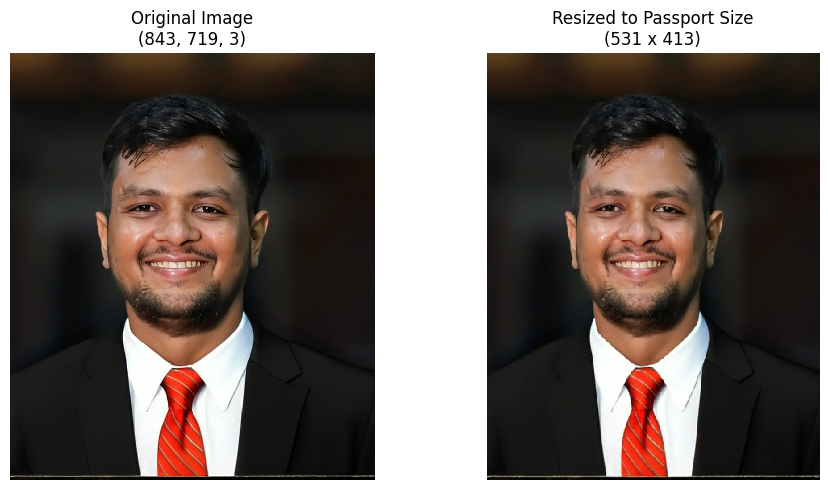

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, transform, img_as_ubyte
import warnings
warnings.filterwarnings('ignore')

# Load a sample image (passport-size or face photo)
url = "https://drive.google.com/uc?id=11LpbXBrEF005XA7k-Wd6W_VNnyXCOtg6"
image = io.imread(url)

# Resize to standard passport size: 531 x 413 pixels (used in many countries)
passport_size = transform.resize(image, (531, 413))

# Show original and resized images
plt.figure(figsize=(15, 5))

# Original
plt.subplot(1, 3, 1)
io.imshow(image)
plt.title("Original Image\n" + f"{image.shape}")
plt.axis('off')

# Resized to passport dimensions
plt.subplot(1, 3, 2)
io.imshow(passport_size)
plt.title("Resized to Passport Size\n(531 x 413)")
plt.axis('off')



plt.tight_layout()
plt.show()


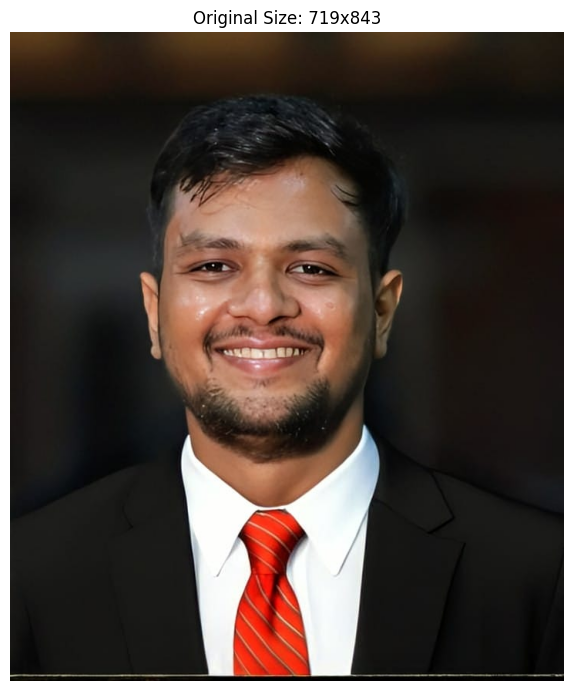

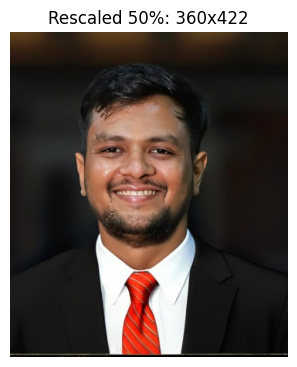

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, transform, img_as_ubyte #img_as_ubyte: Converts image to standard 8-bit per channel format for display.
import warnings
warnings.filterwarnings('ignore')

# Load passport-style image (413px wide)
image = io.imread(url)

# Rescale the image to 50%
rescaled_image = transform.rescale(image, 0.5, channel_axis=-1)#rescale(image, 0.5, ...): Resizes the image to 50% of both width and height.
#Tells skimage that the color channels (RGB) are on the last axis of the array (which is standard for images).


# Function to display an image at its actual pixel size
def show_actual_size(img, title):
    dpi = 100 #Dots per inch: Controls how many pixels are packed into one inch of screen space.

    height, width = img.shape[:2] #Extracts the image's height and width from its shape.

    figsize = (width / dpi, height / dpi)
    # Calculates the figure size in inches that will match the image pixel size.
    # Example: if image is 400px wide and dpi=100, figure should be 4 inches wide.

    fig = plt.figure(figsize=figsize, dpi=dpi)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Show original image in actual size
show_actual_size(image, f"Original Size: {image.shape[1]}x{image.shape[0]}")

# Show rescaled image in actual size (visibly smaller)
show_actual_size(rescaled_image, f"Rescaled 50%: {rescaled_image.shape[1]}x{rescaled_image.shape[0]}")


# Image Rotation and Flipping

Why Do We Use Image Rotation and Flipping?
Image rotation and flipping are basic image transformation techniques used in:

✅ 1. Data Augmentation in Machine Learning
In ML, especially for image classification or face recognition, we often have limited data.

Rotating or flipping an image creates new, synthetic examples without collecting new photos.

This helps models generalize better and not memorize specific orientations.

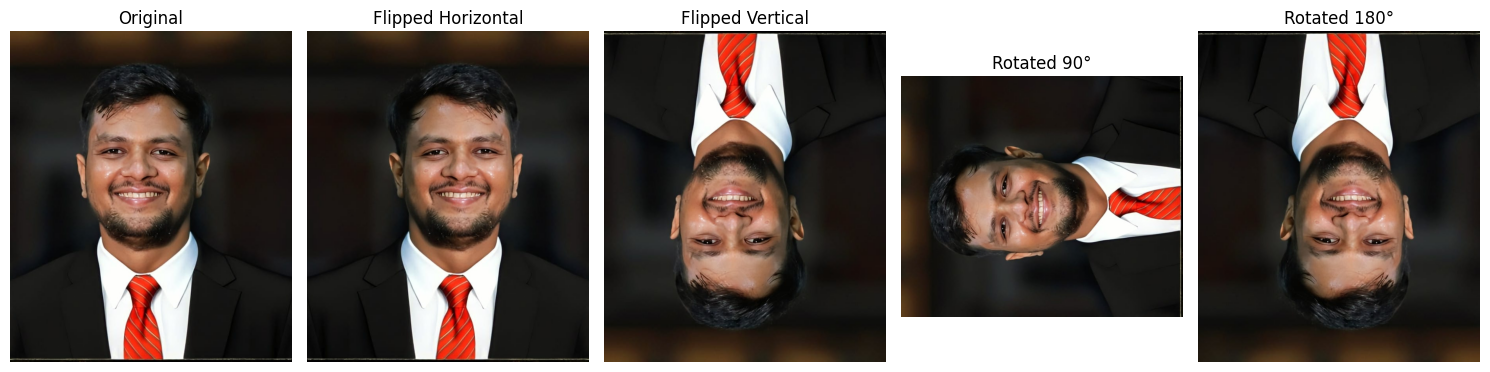

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, transform, img_as_ubyte
import numpy as np

# Load passport-style photo
image = io.imread(url)

# Flip horizontally (like a mirror)
flipped_h = np.fliplr(image)

# Flip vertically (upside down)
flipped_v = np.flipud(image)

# Rotate 90 degrees counter-clockwise
rotated_90 = transform.rotate(image, 90, resize=True)

# Rotate 180 degrees
rotated_180 = transform.rotate(image, 180, resize=True)

# Convert rotated images to uint8 (for display)
rotated_90 = img_as_ubyte(rotated_90)
rotated_180 = img_as_ubyte(rotated_180)

# Display original and transformed images
titles = ['Original', 'Flipped Horizontal', 'Flipped Vertical', 'Rotated 90°', 'Rotated 180°']
images = [image, flipped_h, flipped_v, rotated_90, rotated_180]

plt.figure(figsize=(15, 5))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()


| Transformation  | Code                                   | Purpose                                           |
| --------------- | -------------------------------------- | ------------------------------------------------- |
| Horizontal Flip | `np.fliplr()`                          | Simulates a **mirror image** (common in selfies)  |
| Vertical Flip   | `np.flipud()`                          | Turns photo **upside down** (e.g. scanning error) |
| Rotation 90°    | `transform.rotate(..., 90)`            | Rotate left, helps models see different angles    |
| Rotation 180°   | `transform.rotate(..., 180)`           | Helps correct completely flipped images           |
| `resize=True`   | Ensures rotated images are not cropped |                                                   |


Summary

| What         | Why                                                            |
| ------------ | -------------------------------------------------------------- |
| Rotation     | Adds variety, fixes orientation                                |
| Flipping     | Simulates real-world mirror or camera effects                  |
| Use in ML    | Helps models become **more robust**                            |
| Passport use | Correct angle, train models on **head tilt, face orientation** |


# Image Intensity

What is Image Intensity?
Image intensity refers to the brightness or darkness of pixels in an image — especially in grayscale images.

- In grayscale, intensity ranges from 0 (black) to 255 (white) in uint8.

- In color images, intensity can refer to the luminance or brightness value derived from RGB.

🧭 Why Image Intensity Matters in Industry
 - ✅ 1. Preprocessing for ML models
ML models (like face detection or OCR) are sensitive to brightness.

  Normalizing or adjusting intensity improves model accuracy and robustness.

- ✅ 2. Improving Image Quality
Low-light passport photos or overexposed scans can be enhanced.


- ✅ 3. Standardization
Many systems require image intensities to be within a range for:

    Biometric systems

    Medical imaging

    Document verification





When Using skimage.io.imread()
If you load a grayscale image using skimage, the pixel values are automatically scaled to the range 0.0 to 1.0.

This means:

0.0 = black

1.0 = white

Values like 0.3 mean a dark gray

✅ This is intentional — skimage works with normalized float images for most of its operations.

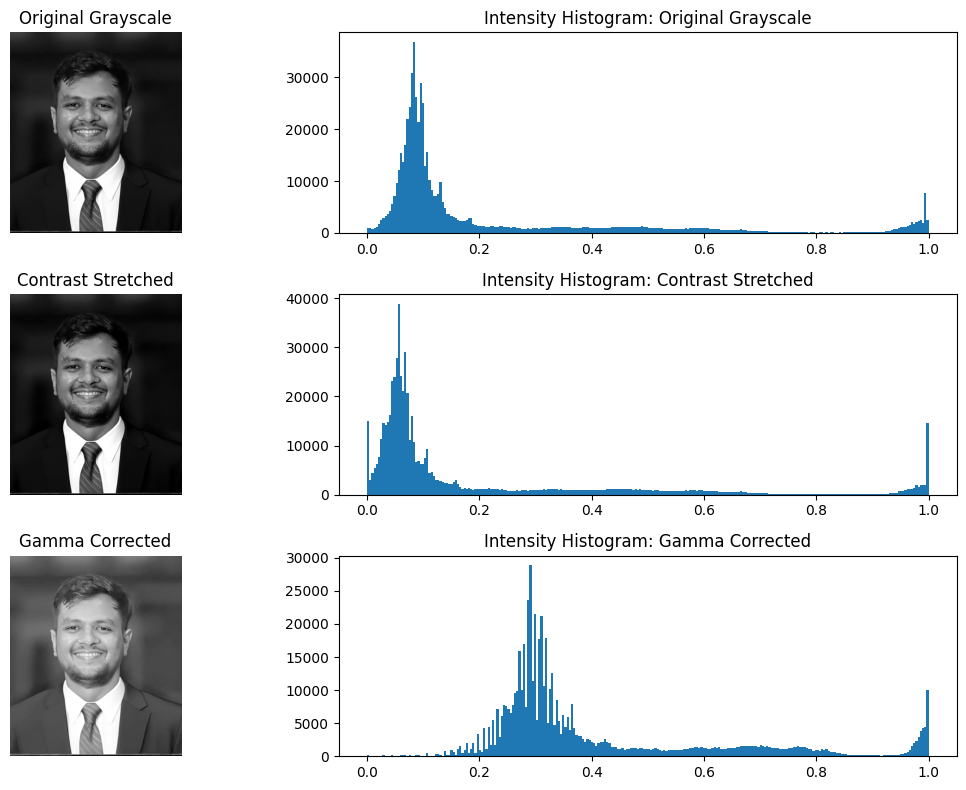

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color, exposure
import numpy as np

# Load image and convert to grayscale
image_rgb = io.imread(url)
image_gray = color.rgb2gray(image_rgb)

# Apply contrast stretching
p2, p98 = np.percentile(image_gray, (2, 98))
contrast_stretch = exposure.rescale_intensity(image_gray, in_range=(p2, p98))
"""
sometimes an image uses only part of the brightness range (like only 0.3 to 0.7).

This makes the image low contrast (dull looking).

rescale_intensity expands that narrow range to the full range → making the image more vivid.

image = np.array([[0.2, 0.3],
                  [0.5, 0.7]])

                  converts to

                  [[0.0, 0.2],
                  [0.6, 1.0]]

Now it's spread out, giving more contrast.


"""

# Apply gamma correction (adjust brightness)
gamma_corrected = exposure.adjust_gamma(image_gray, gamma=0.5)  # Brighter

"""
new_pixel = old_pixel ** gamma
If gamma < 1 → Brightens the image.

If gamma > 1 → Darkens the image.
"""

# Show images and intensity histograms
images = [image_gray, contrast_stretch, gamma_corrected]
titles = ['Original Grayscale', 'Contrast Stretched', 'Gamma Corrected']

plt.figure(figsize=(12, 8))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(3, 2, 2*i+1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.subplot(3, 2, 2*i+2)
    plt.hist(img.ravel(), bins=256, range=(0, 1), fc='black', ec='white')
    #img.ravel()	Flattens the 2D image array into a 1D list of pixel values
    plt.title(f'Intensity Histogram: {title}')

plt.tight_layout()
plt.show()


# Image Cropping

What is Image Cropping?
Cropping is the process of cutting out a rectangular region from an image.

  Used to focus on important areas (like a face),

  Or to augment data (create variety in training images).

| Use Case                   | Why Crop?                                                                |
| -------------------------- | ------------------------------------------------------------------------ |
| **Passport / ID Photos**   | Focus on **face** only, remove background or irrelevant parts            |
| **Medical Imaging**        | Zoom in on a tumor or organ region                                       |
| **Data Augmentation** (ML) | Generate multiple training samples from one image using **random crops** |
| **Object Detection**       | Focus on **bounding boxes** or detected objects                          |
| **Performance**            | Smaller images = faster processing & less memory                         |


🧑‍💼 Use Case 1: Intelligent Cropping (Face-based)
In real-world apps like passport photo apps, visa forms, biometric verification — we need to:

  - ✅Detect the face
  -  Crop only that region
  -  Keep standard aspect ratio

We simulate this by manually defining a face ROI (region of interest)<br>
<br>
🔁 Use Case 2: Random Cropping (Data Augmentation)
In ML tasks like object classification (cats, dogs, flowers), we use random crops to:

  - Prevent overfitting
  - Make models robust to position & scale
  - Simulate variation in object location

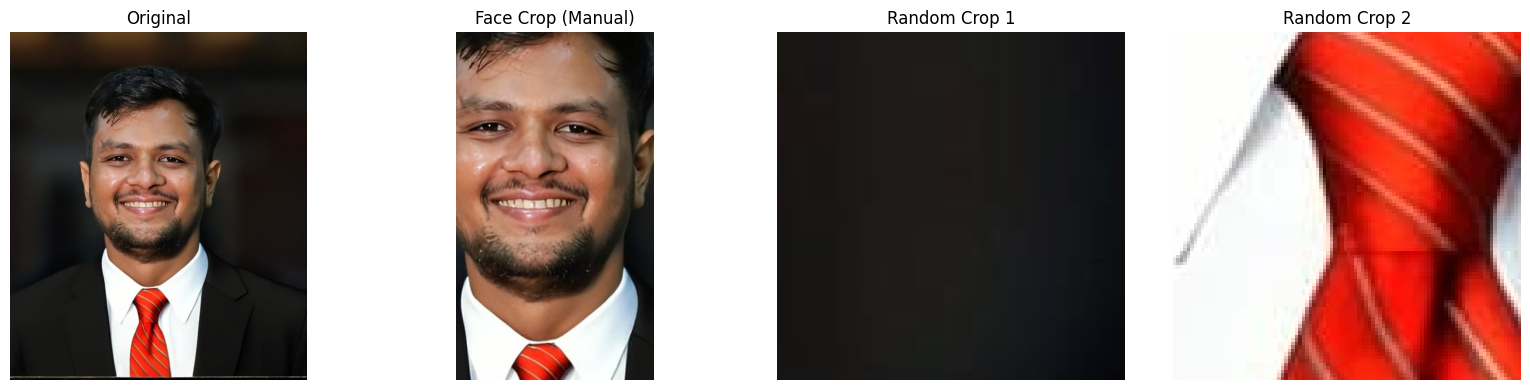

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

# Load image
image = io.imread(url)

# ----- INTELLIGENT CROP (manual face ROI for now) -----
# Assume face is at center (we can use face detector later)
"""
his gets the shape (dimensions) of the image.

h = height (number of rows or pixels top to bottom)

w = width (number of columns or pixels left to right)

_ is the number of channels (like 3 for RGB) — we don’t need it here, so it’s ignored with _.



"""
h, w, _ = image.shape

face_crop = image[int(h*0.2):int(h*0.8), int(w*0.3):int(w*0.7)]
"""
This line crops a rectangular region from the image.

image[startY:endY, startX:endX] is the basic format for cropping.

int(h*0.2):int(h*0.8) → vertical crop from 20% to 80% of the image height
(focus on middle part vertically — probably where the face is).

int(w*0.3):int(w*0.7) → horizontal crop from 30% to 70% of the image width
(center horizontally — again, likely covering the face).

This is a manual crop based on percentage of the image size.
"""


# ----- RANDOM CROP -----
def random_crop(img, crop_size=(100, 100)):

    """
    Crop the image using the random top and left.

    top:top+ch → vertical slice from top to top + crop height

    left:left+cw → horizontal slice from left to left + crop width
    """
    h, w, _ = img.shape
    ch, cw = crop_size
    top = np.random.randint(0, h - ch) #We subtract ch from height to avoid going out of bounds.
    left = np.random.randint(0, w - cw)
    return img[top:top+ch, left:left+cw]


random_crop1 = random_crop(image)
random_crop2 = random_crop(image)

# ----- PLOT -----
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(image)
axes[0].set_title('Original')
axes[1].imshow(face_crop)
axes[1].set_title('Face Crop (Manual)')
axes[2].imshow(random_crop1)
axes[2].set_title('Random Crop 1')
axes[3].imshow(random_crop2)
axes[3].set_title('Random Crop 2')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


# Edge Extraction using the Sobel Filter

What is Edge Detection?
Edge detection highlights the boundaries or contours in an image — where pixel values change sharply.

Think of it as:

“Outlining” objects inside an image (like the boundary of a face, building, number, or object).

| Use Case          | Why It Helps                                |
| ----------------- | ------------------------------------------- |
| Face recognition  | Find face shape or features (eyes, jawline) |
| Object detection  | Highlight objects against background        |
| Document scanning | Extract text edges from paper               |
| Medical imaging   | Detect tumors or organ boundaries           |
| ML preprocessing  | Focus on **structure**, not color/texture   |


Why Sobel Filter?
The Sobel Filter detects edges by computing gradients (change) in:

Horizontal direction (Sobel-x)

Vertical direction (Sobel-y)

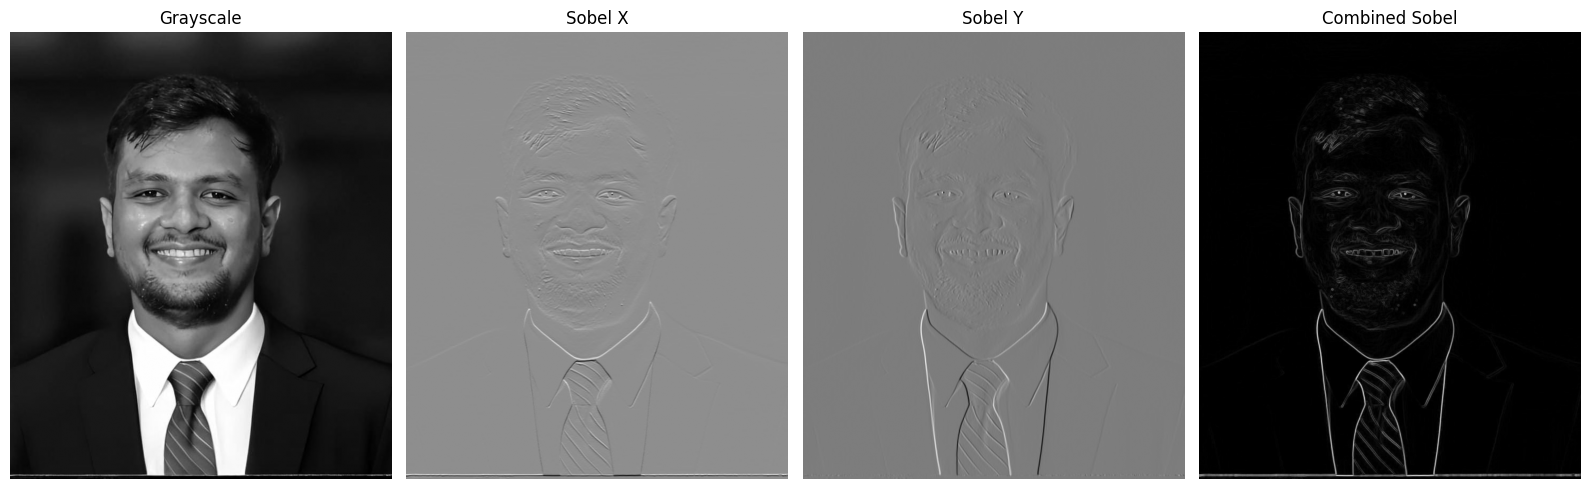

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color, filters
url = "https://drive.google.com/uc?id=11LpbXBrEF005XA7k-Wd6W_VNnyXCOtg6"

# Step 1: Load image
image = io.imread(url)

# Step 2: Convert to grayscale
gray = color.rgb2gray(image)

# Step 3: Apply Sobel filters
sobel_x = filters.sobel_h(gray)
sobel_y = filters.sobel_v(gray)
sobel_combined = filters.sobel(gray)

# Step 4: Show all results using simple subplot
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Y")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Combined Sobel")
plt.axis('off')

plt.tight_layout()
plt.show()


| Line                           | What It Does                                                        |
| ------------------------------ | ------------------------------------------------------------------- |
| `gray = color.rgb2gray(image)` | Converts RGB to grayscale (needed for edge detection)               |
| `filters.sobel_h()`            | Detects **horizontal edges** (dark-light transitions left to right) |
| `filters.sobel_v()`            | Detects **vertical edges** (top-bottom transitions)                 |
| `filters.sobel()`              | Applies both Sobel-x and Sobel-y → shows all edges                  |
| `cmap='gray'`                  | Shows result in grayscale (better for edges)                        |
| `plt.subplots()`               | Displays images side-by-side for comparison                         |


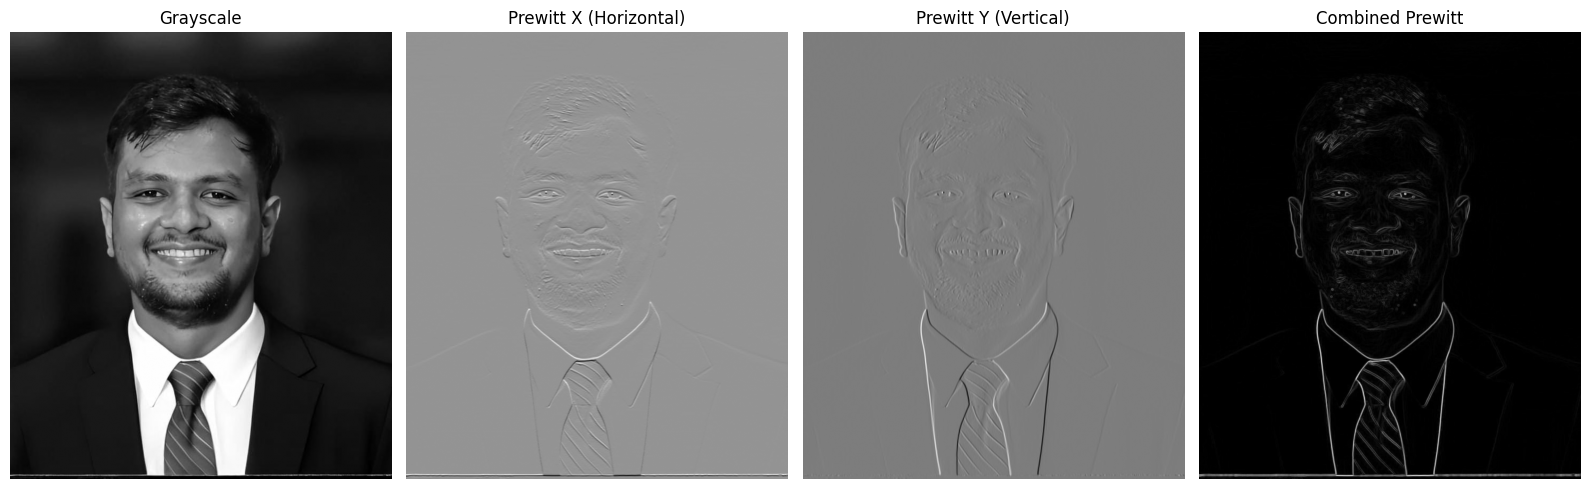

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color, filters

# Step 1: Load the image
image = io.imread(url)

# Step 2: Convert to grayscale
gray = color.rgb2gray(image)

# Step 3: Apply Prewitt filter
prewitt_x = filters.prewitt_h(gray)  # Horizontal edges
prewitt_y = filters.prewitt_v(gray)  # Vertical edges
prewitt_combined = filters.prewitt(gray)  # Combined edges

# Step 4: Plot using basic subplot
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(prewitt_x, cmap='gray')
plt.title("Prewitt X (Horizontal)")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(prewitt_y, cmap='gray')
plt.title("Prewitt Y (Vertical)")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(prewitt_combined, cmap='gray')
plt.title("Combined Prewitt")
plt.axis('off')

plt.tight_layout()
plt.show()


# Bonus Topics

# Image Denoising

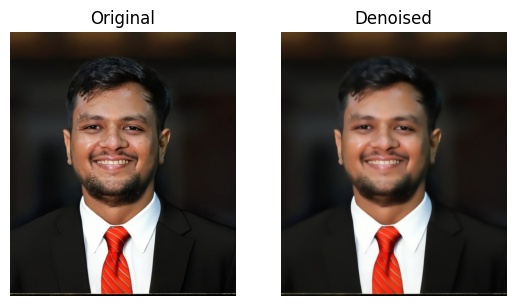

In [ ]:
from skimage.restoration import denoise_tv_chambolle
from skimage import io, img_as_float
import matplotlib.pyplot as plt

image = io.imread(url)
image_float = img_as_float(image)

denoised = denoise_tv_chambolle(image_float, weight=0.1, channel_axis=-1)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised)
plt.title("Denoised")
plt.axis('off')
plt.show()


# Canny Edge Detection

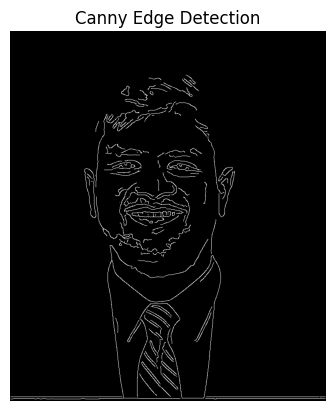

In [ ]:
from skimage import feature, color

gray = color.rgb2gray(image)
edges = feature.canny(gray, sigma=2)

plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()
